Solving environment: ...working... done

## Package Plan ##

  environment location: C:\Users\Aman\anaconda3

  added / updated specs:
    - word2number


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2023.7.22  |       h56e8100_0         146 KB  conda-forge
    certifi-2023.7.22          |     pyhd8ed1ab_0         150 KB  conda-forge
    openssl-1.1.1u             |       h2bbff1b_0         5.5 MB
    word2number-1.1            |             py_0           8 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         5.8 MB

The following NEW packages will be INSTALLED:

  word2number        conda-forge/noarch::word2number-1.1-py_0 

The following packages will be UPDATED:

  ca-certificates    pkgs/main::ca-certificates-2023.01.10~ --> conda-forge::ca-certificates-2023.7.22-h56e8100_0 
  ce



==> WARNING: A newer version of conda exists. <==
  current version: 23.1.0
  latest version: 23.7.2

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.7.2




In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from word2number import w2n

In [31]:
data = pd.read_csv("hiring.csv")
data

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
data.rename(columns={'test_score(out of 10)':'test_score','interview_score(out of 10)':'interview_score','salary($)':'salary'}, inplace = True)
data

,experience,test_score,interview_score,salary
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
data_median = data.test_score.median()
data_median

8.0

In [5]:
import math
data.test_score = data.test_score.fillna(data_median)

In [17]:
data.experience = data.experience.fillna('zero')
data

,experience,test_score,interview_score,salary
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


In [20]:
reg = LinearRegression()
reg.fit(data[['experience','test_score','interview_score']], data.salary)

LinearRegression()

In [23]:
import math
math.floor(reg.predict([[4,9,9]]))

C:\Users\Aman\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


65447

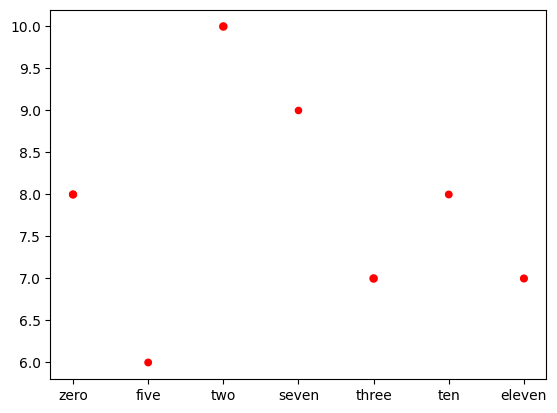

In [43]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.scatter(data.experience, data.test_score, data.interview_score , color = 'red', linewidth = 3)